In [41]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [43]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
# X_test = X_test.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [57]:

# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    
  
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [58]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [60]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [61]:
# 모델의 실행
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=10, verbose=2, 
                    callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10

Epoch 00001: val_loss improved from inf to 0.04266, saving model to ./model/mnist-cnn-01-0.0427.hdf5
60000/60000 - 53s - loss: 0.1884 - accuracy: 0.9433 - val_loss: 0.0427 - val_accuracy: 0.9855
Epoch 2/10

Epoch 00002: val_loss improved from 0.04266 to 0.03702, saving model to ./model/mnist-cnn-02-0.0370.hdf5
60000/60000 - 53s - loss: 0.0767 - accuracy: 0.9780 - val_loss: 0.0370 - val_accuracy: 0.9880
Epoch 3/10

Epoch 00003: val_loss improved from 0.03702 to 0.02982, saving model to ./model/mnist-cnn-03-0.0298.hdf5
60000/60000 - 54s - loss: 0.0571 - accuracy: 0.9827 - val_loss: 0.0298 - val_accuracy: 0.9906
Epoch 4/10

Epoch 00004: val_loss improved from 0.02982 to 0.02624, saving model to ./model/mnist-cnn-04-0.0262.hdf5
60000/60000 - 53s - loss: 0.0451 - accuracy: 0.9862 - val_loss: 0.0262 - val_accuracy: 0.9919
Epoch 5/10

Epoch 00005: val_loss did not improve from 0.02624
60000/60000 - 53s - loss: 0.0348 - accuracy: 0.

In [62]:
from tensorflow.keras.models import load_model
#del model
model = load_model('model/mnist-cnn-04-0.0262.hdf5')

In [63]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test, verbose=0)[1]))


 Test Accuracy: 0.9919


In [64]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

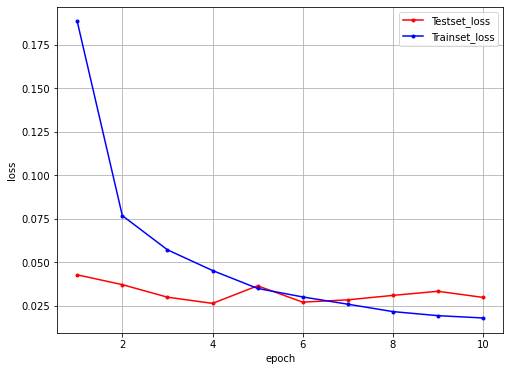

In [65]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()